In [ ]:
# conda install -c conda-forge osmnx

# https://osmnx.readthedocs.io/en/stable/
# https://qiita.com/moshi/items/e383491664d028cd2166
# 
# https://zenn.dev/homing/articles/f9a314841c737d
# https://qiita.com/naozo-se/items/bc168a2282907a6b29bf


# https://stackoverflow.com/questions/62285134/how-to-fill-water-bodies-with-osmnx-in-python

In [17]:
import folium
import osmnx as ox

import geopandas as gpd

# 対象地域の道路情報取得 (愛知県名古屋市中村区)
#query = "Nakamuraku,Nagoya,Aichi,Japan"
#G = ox.graph_from_place(query, network_type="drive")

(lat,lon)=(34.69199639822432, 135.49084584150586)

# Bounding box
bN,bS,bE,bW=lon+1,lon-1,lon-1,lon+1

#graph=ox.graph.graph_from_point((lat, lon),
#                                dist=1000,
#                                network_type='drive')
graph=ox.geometries.geometries_from_bbox(bN, bS, bE, bW,
                                tags={"natural": "water"})

# 道路グラフネットワーク可視化
#fmap=ox.plot_graph_folium(graph)
fmap=ox.plot_graph_folium(graph)
folium.LayerControl().add_to(fmap)
fmap


#fmap.save(outfile="road_network.html")
#opts = {"node_size": 5, "bgcolor": "white", "node_color": "blue", "edge_color": "blue"}
#ox.plot_graph(G, show=False, save=True, filepath="road_network.png", **opts)

/var/folders/mn/nmxx09wj21j7f81mwghvt1sw0000gn/T/ipykernel_40987/1645265506.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph=ox.geometries.geometries_from_bbox(bN, bS, bE, bW,
/opt/anaconda3/envs/jupyter-book-py311/lib/python3.11/site-packages/osmnx/geometries.py:48: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  return features.features_from_bbox(north, south, east, west, tags=tags)


RuntimeError: Unable to determine UTM CRS

/var/folders/mn/nmxx09wj21j7f81mwghvt1sw0000gn/T/ipykernel_40987/273932149.py:11: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  poly = ox.utils_geo.bbox_to_poly(*bbox)


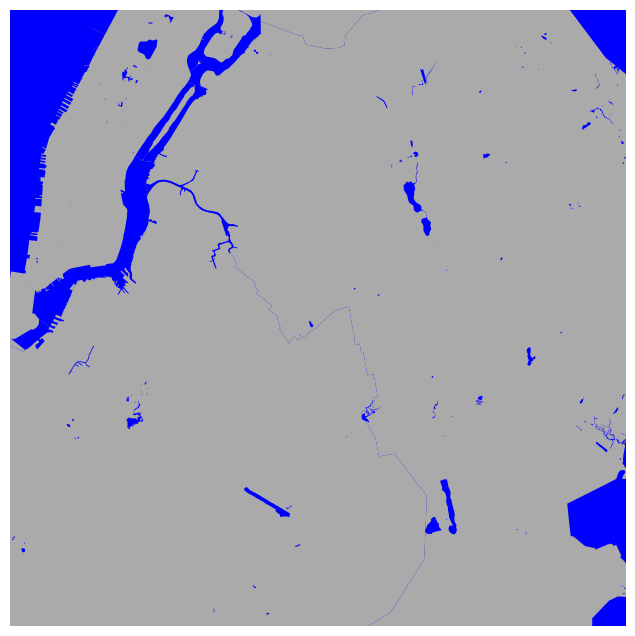

In [19]:
import osmnx as ox
ox.settings.log_console = True

# add more items here to get all the landforms you want
places = ['Manhattan, NY, USA', 'Brooklyn, NY, USA', 'Queens, NY, USA', 'Bronx, NY, USA']
land = ox.geocode_to_gdf(places)

# get the water bodies
left, bottom, right, top = land.total_bounds
bbox = top, bottom, right, left
poly = ox.utils_geo.bbox_to_poly(*bbox)
water = ox.features_from_polygon(poly, tags={'natural': 'water'})

# constrain the plotting window as desired
c = land.unary_union.centroid
bbox = ox.utils_geo.bbox_from_point((c.y, c.x), dist=12000)

water_color = 'blue'
land_color = '#aaaaaa'
fig, ax = ox.plot_footprints(water, bbox=bbox,
                             color=water_color, bgcolor=water_color,
                             show=False, close=False)
ax = land.plot(ax=ax, zorder=0, fc=land_color)

In [21]:
import osmnx as ox
import folium

# 場所を設定（例：東京都渋谷区）
place_name = "Shibuya, Tokyo, Japan"

(lat,lon)=(34.69199639822432, 135.49084584150586)

# 陸地と道路のグラフを取得
#G = ox.graph_from_place(place_name, network_type='drive')
G = ox.graph_from_point((lat,lon), network_type='drive')

nodes, edges = ox.graph_to_gdfs(G)

# 中心点を取得
lat = nodes['y'].mean()
lon = nodes['x'].mean()

# foliumマップを作成
m = folium.Map(location=[lat, lon], zoom_start=14)

# 陸地を描画
folium.GeoJson(data=edges).add_to(m)

# マップを保存または表示
m.save('map.html')

# マップを表示（Jupyter Notebookの場合）
m


In [22]:
import osmnx as ox
import folium
import geopandas as gpd

# 場所を設定（例：東京都渋谷区）
place_name = "Shibuya, Tokyo, Japan"

# 陸地のポリゴンを取得
land_polygons = ox.geometries.geometries_from_place(place_name, tags={'natural': 'land'})

# 水域のポリゴンを取得
water_polygons = ox.geometries.geometries_from_place(place_name, tags={'natural': ['water', 'bay', 'strait']})

# 道路のグラフを取得
G = ox.graph_from_place(place_name, network_type='drive')
nodes, edges = ox.graph_to_gdfs(G)

# 中心点を取得
lat = nodes['y'].mean()
lon = nodes['x'].mean()

# foliumマップを作成
m = folium.Map(location=[lat, lon], zoom_start=14)

# 陸地を描画
for _, polygon in land_polygons.iterrows():
    folium.GeoJson(polygon['geometry'], style_function=lambda x: {'fillColor': 'green', 'color': 'green'}).add_to(m)

# 水域を描画
for _, polygon in water_polygons.iterrows():
    folium.GeoJson(polygon['geometry'], style_function=lambda x: {'fillColor': 'blue', 'color': 'blue'}).add_to(m)

# 道路を描画
folium.GeoJson(data=edges).add_to(m)

# マップを保存または表示
m.save('map.html')

# マップを表示（Jupyter Notebookの場合）
m

/var/folders/mn/nmxx09wj21j7f81mwghvt1sw0000gn/T/ipykernel_40987/388463500.py:9: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  land_polygons = ox.geometries.geometries_from_place(place_name, tags={'natural': 'land'})


InsufficientResponseError: No data elements in server response. Check log and query location/tags.

In [35]:
import osmnx as ox
import folium
import geopandas as gpd
from shapely.geometry import Polygon

# 場所を設定（例：東京都渋谷区）
place_name = "odaiba, Tokyo, Japan"

(lat,lon)=(34.69199639822432, 135.49084584150586)
# 道路のグラフを取得
#G = ox.graph_from_point((lat,lon), network_type='drive')
G = ox.graph_from_point((lat,lon), network_type='drive')

nodes, edges = ox.graph_to_gdfs(G)

# 中心点を取得
lat = nodes['y'].mean()
lon = nodes['x'].mean()

# 自然地理データを取得
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#water = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# 地図の範囲を設定
#bounds = ox.geocode_to_gdf(place_name).geometry.iloc[0].bounds
#minx, miny, maxx, maxy = bounds

# 指定した範囲でクリップ
#world_clipped = world.cx[minx:maxx, miny:maxy]
#water_clipped = water.cx[minx:maxx, miny:maxy]

# foliumマップを作成
# https://python-visualization.github.io/folium/latest/user_guide/raster_layers/tiles.html
# https://leaflet-extras.github.io/leaflet-providers/preview/

attr = (
    '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> '
    'contributors, &copy; <a href="https://cartodb.com/attributions">CartoDB</a>'
)
tiles = "https://{s}.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png"

    
m = folium.Map(location=[lat, lon], zoom_start=14,tiles=tiles,attr=attr)

# 陸地を描画
#folium.GeoJson(world_clipped, style_function=lambda x: {'fillColor': 'green', 'color': 'green'}).add_to(m)

# 水域を描画
#folium.GeoJson(water_clipped, style_function=lambda x: {'fillColor': 'blue', 'color': 'blue'}).add_to(m)

# 道路を描画
folium.GeoJson(data=edges).add_to(m)

# マップを保存または表示
m.save('map.html')

# マップを表示（Jupyter Notebookの場合）
m